In [1]:
import numpy as np
from control.matlab import *
from matplotlib import pyplot as plt

In [3]:
#伝達関数の生成
sys = ss("-3, -2; -2, -3","0;1","1, 0",0);
print(sys)#状態ベクトルを確認


#1～10 s を100 Hz でシミュレーション
t = np.arange(0,10,step=0.01);
u = np.ones(np.size(t));
x0 = [[1],[0]];

#今回はlsim関数を利用．x の内部に各状態の時間変化が格納される．
y, T, x=lsim(sys, U=u, T=t, X0=x0);

A = [[-3. -2.]
 [-2. -3.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]



In [4]:
Xa1 = np.exp(-t) + 2/5*np.exp(-5*t)-2/5;
Xa2 = -np.exp(-t) + 2/5*np.exp(-5*t)+3/5;

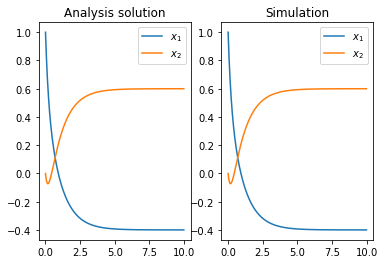

In [5]:

fig, axes = plt.subplots(1,2)
axes[0].plot(T, Xa1);#X1の解析解
axes[0].plot(T, Xa2);#X2の解析解
axes[0].set_title("Analysis solution");
axes[0].legend(["$x_1$","$x_2$"]);

axes[1].plot(T,x[:,0]);#X1の数値解
axes[1].plot(T,x[:,1]);#X2の数値解
axes[1].set_title("Simulation");
axes[1].legend(["$x_1$","$x_2$"]);
plt.show()

In [30]:
A=np.array([[0, 1],[-2,-3]]);
Q=np.array([[1, 1],[1,1]]);

In [38]:
#Qが半正定である確認
np.linalg.eig(Q)[0]

array([1., 1.])

In [35]:
#Pの導出
P=lyap(A.T,Q)
#正定である確認
np.linalg.eig(P)[0]

array([0. , 0.5])

In [36]:
#Qを変更
Q=np.array([[1, 0],[0,1]]);

In [37]:
#Pの導出
P=lyap(A.T,Q)
#正定である確認
np.linalg.eig(P)[0]

array([1.30901699, 0.19098301])